In [16]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2


In [17]:

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [18]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [19]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [20]:
population_model = "PBH-lognormal-2nd"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_2/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [21]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

10:01 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2/'
10:01 bilby INFO    : Search parameters:
10:01 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
10:01 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
10:01 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
10:01 bilby INFO    :   H0 = 67.4
10:01 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:79: RuntimeWarning: divide by zero encountered in log
10:02 bilby INFO    : Single likelihood evaluation took 6.509e-01 s


0it [00:00, ?it/s]

10:02 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f94dc3b5880>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
10:02 bilby INFO    : Checkpoint every check_point_delta_t = 60s
10:02 bilby INFO    : Using dynesty version 1.0.1
10:02 bilby INFO    : Using the bilby-implemented rwalk sampl

5744it [00:00, 19986.53it/s, bound:507 nc:  1 ncall:1.8e+05 eff:3.2% logz=-1762.52+/-0.17 dlogz:0.100>0.1]

10:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
10:03 bilby INFO    : Writing 1547 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
10:03 bilby INFO    : Starting to close worker pool.
10:03 bilby INFO    : Finished closing worker pool.


5744it [00:02, 2143.87it/s, bound:507 nc:  1 ncall:1.8e+05 eff:3.5% logz=-1762.44+/-0.18 dlogz:0.000>0.1] 

10:03 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:03 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:03 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:03 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:03 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:03 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:03 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


10:03 bilby INFO    : Sampling time: 1:53:09.963586
10:03 bilby INFO    : Summary of results:
nsamples: 6244
ln_noise_evidence:    nan
ln_evidence: -1762.438 +/-  0.177
ln_bayes_factor:    nan +/-  0.177



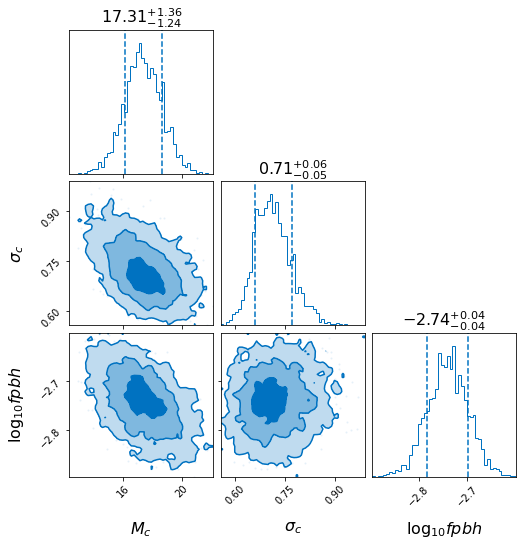

In [22]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [5]:
import matplotlib.lines as mlines
import numpy as np
import corner
import matplotlib.pyplot as plt

outdir1 = "H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5/"
outdir2 = "H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)

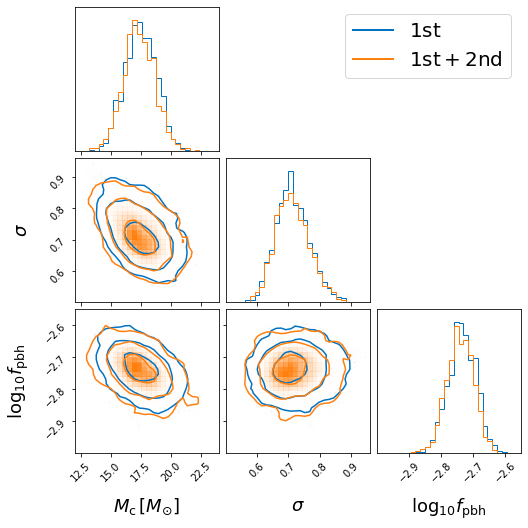

In [6]:
fig = corner.corner(posteriors1, bins=30, smooth=0.9, color='#0072C1', labels=[r"$M_\mathrm{c}\, [M_{\odot}]$", r"$\sigma$", r"$\log_{10}f_\mathrm{pbh}$"],
                    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), plot_density=True, plot_datapoints=True, fill_contours=False,
                    show_titles=False, title_kwargs={"fontsize": 18}, label_kwargs=dict(fontsize=18), range=((12, 24), (0.5, 0.96), (-3, -2.55)))

corner.corner(posteriors2, bins=30, smooth=0.9, color='#FF7F0E', labels=[r"$M_\mathrm{c}\, [M_{\odot}]$", r"$\sigma$", r"$\log_{10}f_\mathrm{pbh}$"],
              levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), plot_density=True, plot_datapoints=True, fill_contours=False,
              show_titles=False, title_kwargs={"fontsize": 18}, label_kwargs=dict(fontsize=18), range=((12, 24), (0.5, 0.96), (-3, -2.55)), fig=fig)

blue_line = mlines.Line2D([], [], color='#0072C1', lw=2, label=r'$\rm{1st}$')
orange_line = mlines.Line2D([], [], color='#FF7F0E', lw=2, label=r'$\rm{1st+2nd}$')
plt.legend(handles=[blue_line, orange_line], bbox_to_anchor=(
    1, 3.12), loc='upper right', fontsize=20)  # prop={'size': 8})
plt.savefig("../latex/post-log.pdf")
plt.show()


In [94]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)


In [95]:
posts = posteriors2[:, 0]
get_credibles(posts)

(17.31060950152863, 2.214250623140142, 2.046515035005381)

In [96]:
posts = posteriors2[:, 1]
get_credibles(posts)

(0.708743863834724, 0.09859546321303203, 0.07848575052600681)

In [97]:
posts = posteriors2[:, 2]
get_credibles(posts)

(-2.7407259972465035, 0.06725654577618245, 0.06799388195344447)